# Notation and Variables

## Gender
* Y = % of male citizens in city
* X = % of users who publish positive posts about Dilma
* W1 = % of male who publish positive posts about Dilma
* W2 = % of female who publish positive posts about Dilma
* N = Number of users sampled

## Age
* Y = % of people with less than 40 years in city
* X = % of users who publish positive posts about Dilma
* W1 = % of people with less than 40 years who publish positive posts about Dilma
* W2 = % of people with less than 40 years who publish positive posts about Dilma
* N = Number of users sampled

# Loading gender and age data

In [9]:
gender_data = read.csv("../data/social_genero.csv")
age_data = read.csv("../data/social_idade.csv")
#using only samples with more than 100 microdata
gender_data = gender_data[gender_data$N>100,]
gender_data[1:10,]
age_data = age_data[age_data$N>100,]
age_data[1:10,]
sprintf("Mean of male support to Dilma over cities: %f%%", mean(gender_data$W1)) 
sprintf("Mean of female support to Dilma over cities: %f%%", mean(gender_data$W2)) 
sprintf("Mean of people with less than 40 years support to Dilma over cities: %f%%", mean(age_data$W1)) 
sprintf("Mean of people with more than 40 years support to Dilma over cities: %f%%", mean(age_data$W2)) 

,MUNICIPIO,Y,X,W1,W2,N
1,Rio de Janeiro,0.468,0.1103315,0.0956015,0.1260355,13967
2,São Paulo,0.474,0.06923765,0.06046832,0.08189227,12291
3,Belo Horizonte,0.469,0.08681341,0.07481126,0.1047766,4861
4,Porto Alegre,0.464,0.09200196,0.0769549,0.1139241,4076
5,São Bernardo do Campo,0.483,0.1388227,0.1252115,0.1595197,2939
6,Curitiba,0.477,0.086121,0.06535142,0.1144781,2810
7,Brasília,0.478,0.1049815,0.09445746,0.1167247,2429
8,Recife,0.462,0.08801415,0.07674597,0.1033403,2261
9,Fortaleza,0.468,0.09837134,0.08342362,0.120915,1535
10,Goiânia,0.477,0.07515234,0.07344633,0.0777027,1477


,MUNICIPIO,Y,X,W1,W2,N
1,Rio de Janeiro,0.592,0.1091431,0.1185976,0.09265905,16712
2,São Paulo,0.635,0.06986437,0.08031479,0.05326255,15115
3,Belo Horizonte,0.622,0.08705281,0.09939362,0.06403467,5870
4,Porto Alegre,0.589,0.09578387,0.1114939,0.06556409,4886
5,São Bernardo do Campo,0.641,0.1414113,0.1568831,0.122549,3557
6,Curitiba,0.632,0.08736483,0.09785094,0.06932931,3514
7,Brasília,0.705,0.1082077,0.1190999,0.09114359,2985
8,Recife,0.636,0.08953015,0.09337349,0.08245446,2703
9,Fortaleza,0.679,0.09456635,0.09971778,0.08695652,1914
10,Goiânia,0.669,0.07688083,0.09324209,0.04754601,1821


[1] "Mean of male support to Dilma over cities: 0.083678%"

[1] "Mean of female support to Dilma over cities: 0.121508%"

[1] "Mean of people with less than 40 years support to Dilma over cities: 0.108461%"

[1] "Mean of people with more than 40 years support to Dilma over cities: 0.087916%"

# Plotting ECDF s

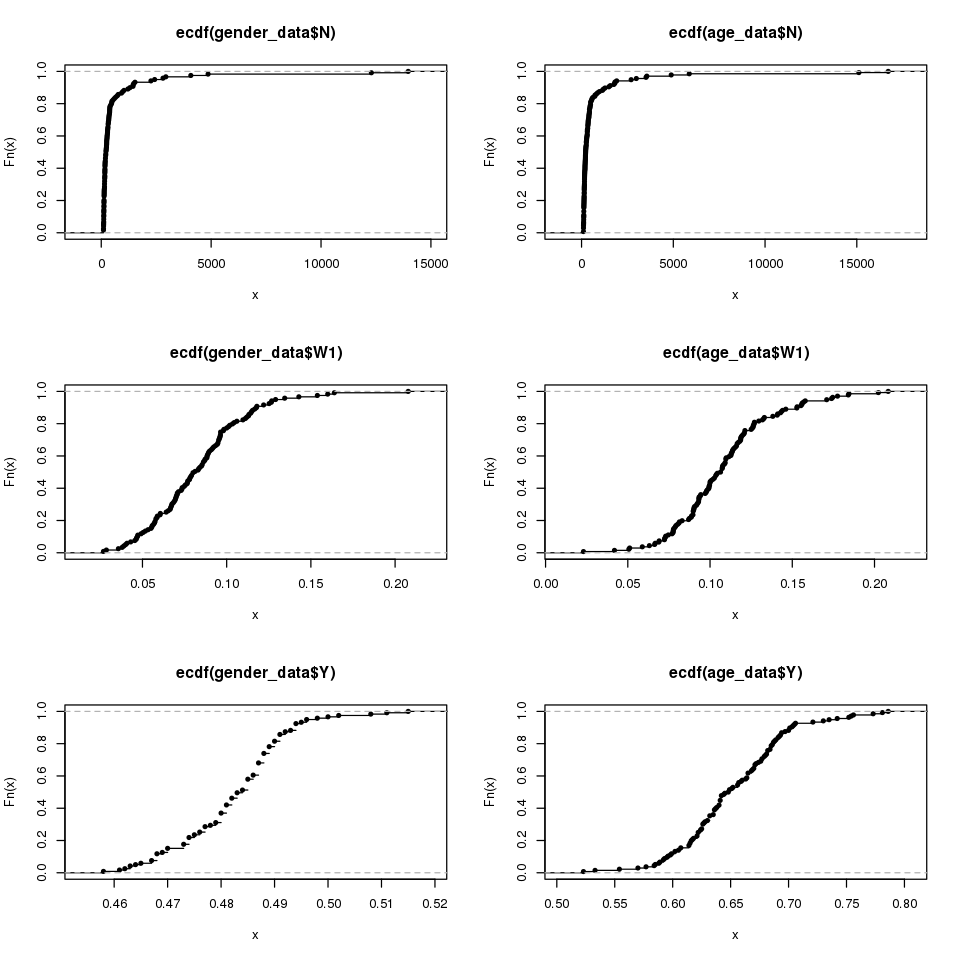

In [50]:
par(mfrow=c(3,2))
options(repr.plot.width=8, repr.plot.height=8)
plot(ecdf(gender_data$N))
plot(ecdf(age_data$N))
plot(ecdf(gender_data$W1))
plot(ecdf(age_data$W1))
plot(ecdf(gender_data$Y))
plot(ecdf(age_data$Y))

# Is there a correlation between aggregate gender/age and support to Dilma over cities?

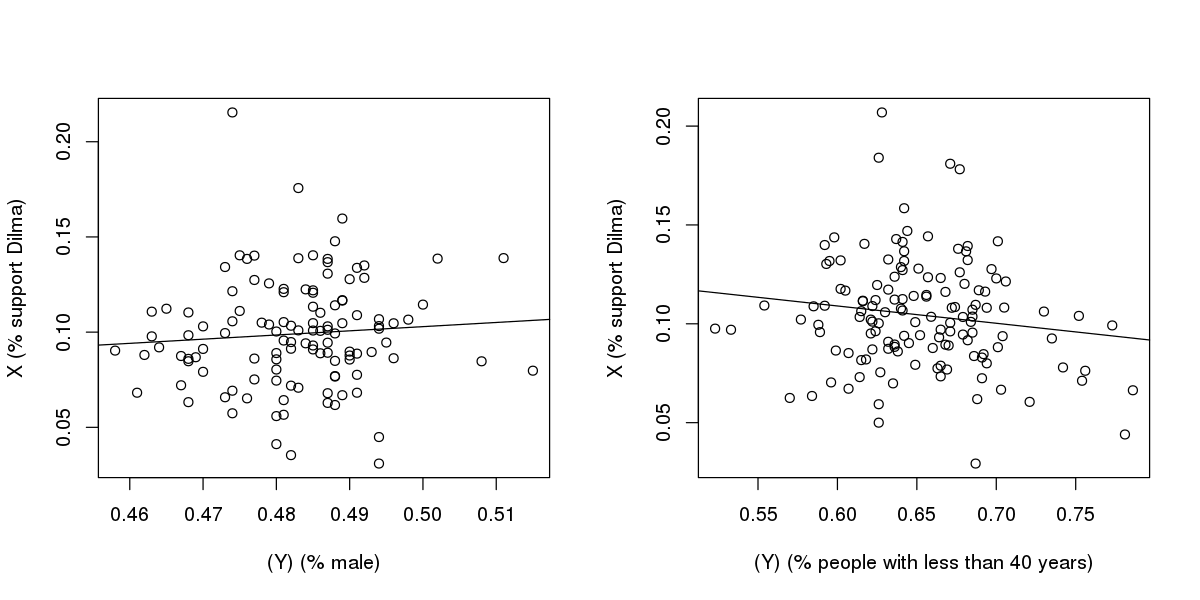

In [20]:
par(mfrow=c(1,2))
options(repr.plot.width=10, repr.plot.height=5)
plot(gender_data$Y, (gender_data$X),xlab="(Y) (% male)", ylab="X (% support Dilma)")
fit <- lm( gender_data$X ~ (gender_data$Y) )
abline(fit)
plot(age_data$Y, (age_data$X),xlab="(Y) (% people with less than 40 years)", ylab="X (% support Dilma)")
fit <- lm( age_data$X ~ (age_data$Y) )
abline(fit)

# Using ground-truth of inner cells, we can see correlation between IBGE census versus observed gender and age support to Dilma 

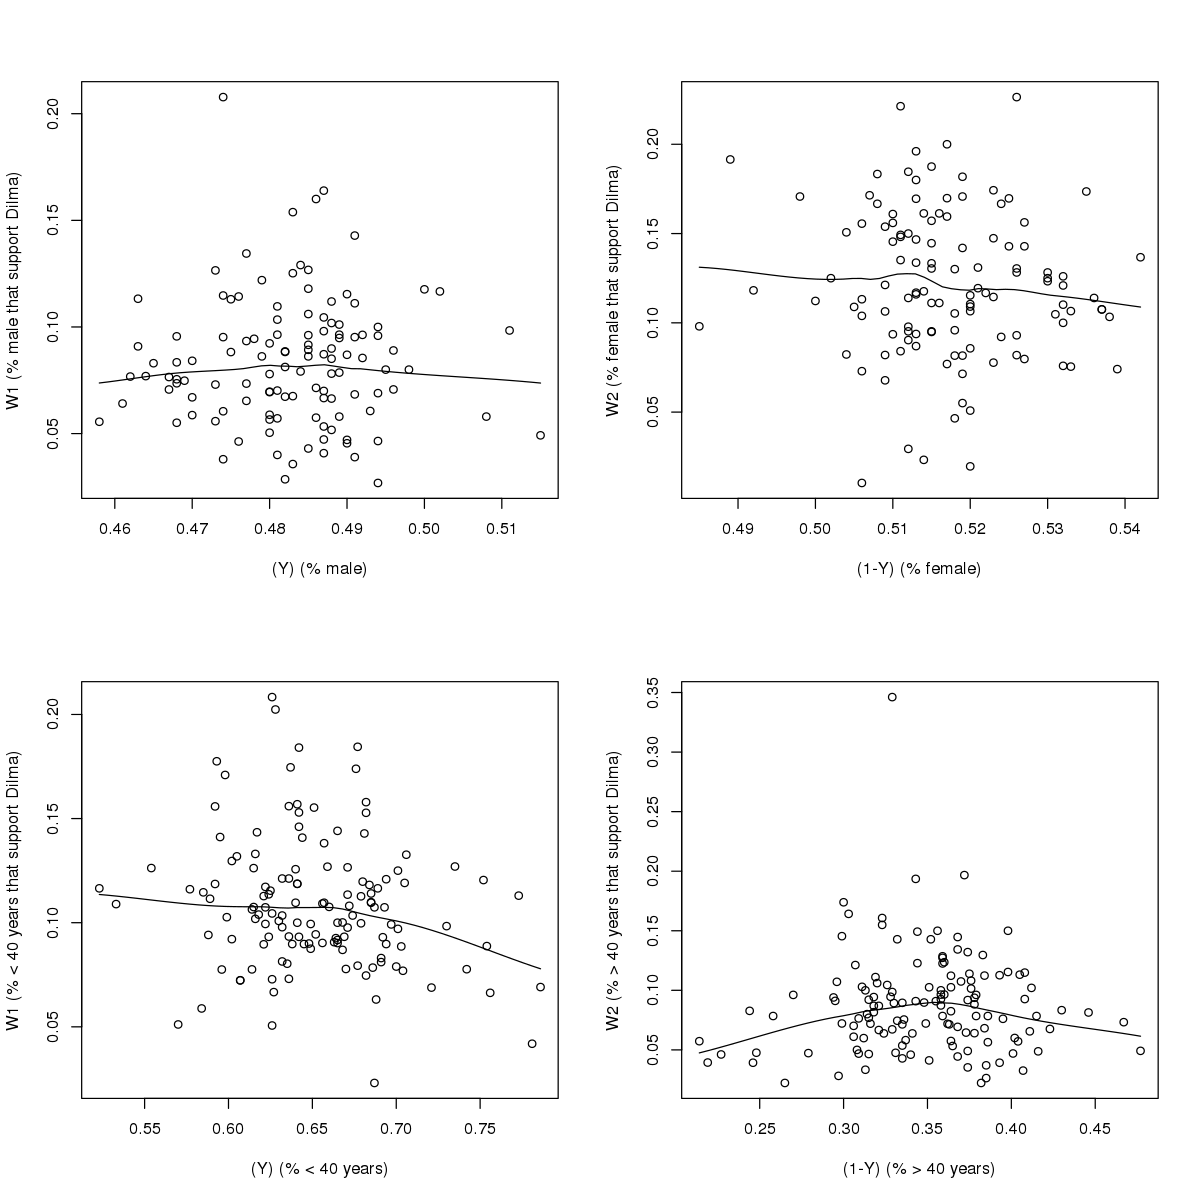

In [23]:
require(graphics)
par(mfrow=c(2,2))
options(repr.plot.width=10, repr.plot.height=10)
scatter.smooth(gender_data$Y, gender_data$W1 ,xlab="(Y) (% male)", ylab="W1 (% male that support Dilma)")
scatter.smooth(1-gender_data$Y, gender_data$W2,xlab="(1-Y) (% female)", ylab="W2 (% female that support Dilma)")
scatter.smooth(age_data$Y, age_data$W1 ,xlab="(Y) (% < 40 years)", ylab="W1 (% < 40 years that support Dilma)")
scatter.smooth(1-age_data$Y, age_data$W2,xlab="(1-Y) (% > 40 years)", ylab="W2 (% > 40 years that support Dilma)")

# Tomography plots

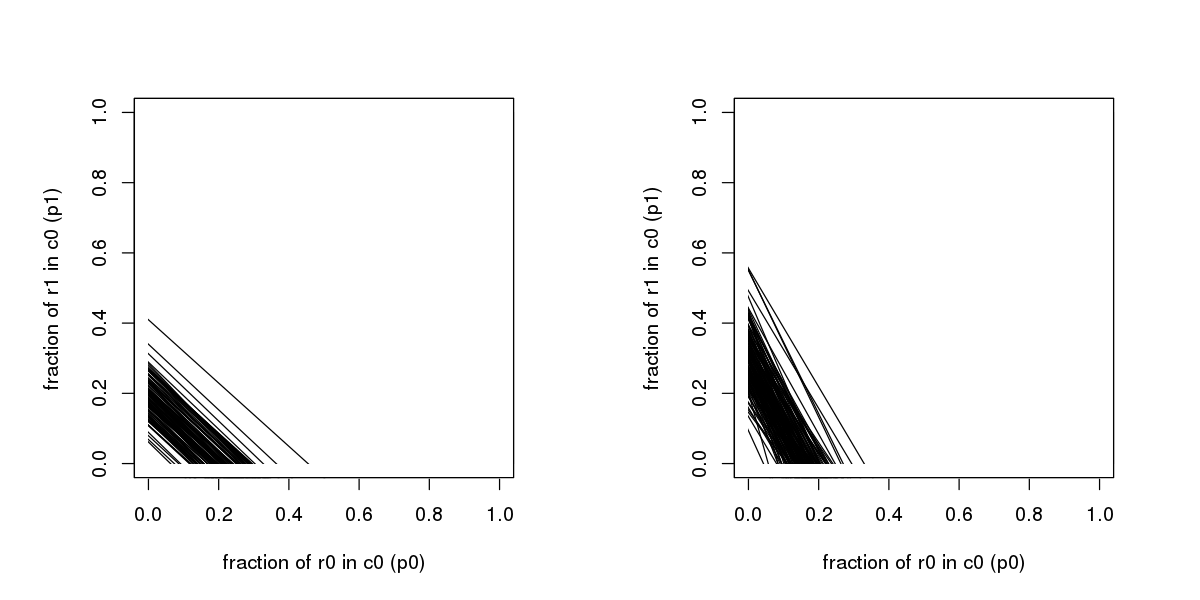

In [32]:
library(MCMCpack)
par(mfrow=c(1,2))
options(repr.plot.width=10, repr.plot.height=5)
a <-tomogplot( gender_data$Y , (1- gender_data$Y), (gender_data$X), (1-gender_data$X))
a <-tomogplot( age_data$Y ,(1-age_data$Y) , (age_data$X), (1-age_data$X))